In [1]:
'''
!apt-get install fonts-nanum -qq -y
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
exit()
'''

'\n!apt-get install fonts-nanum -qq -y\n!sudo fc-cache -fv\n!rm ~/.cache/matplotlib -rf\nexit()\n'

In [2]:
# import matplotlib.pyplot as plt
# from matplotlib import font_manager, rc

In [3]:
'''
font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
'''

"\nfont_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'\nfont = font_manager.FontProperties(fname=font_path).get_name()\nrc('font', family=font)\n"

In [4]:
'''
plt.scatter([0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 5])
plt.title('한글 테스트!')
plt.show()
'''

"\nplt.scatter([0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 5])\nplt.title('한글 테스트!')\nplt.show()\n"

* [jmd_imagescraper](https://joedockrill.github.io/jmd_imagescraper/) 사용
* [DuckDuckGo](https://duckduckgo.com/) 검색엔진에서 이미지를 크롤링 할 수 있게 도와주는 패키지를 제공

In [5]:
# !pip install jmd_imagescraper

In [6]:
# from jmd_imagescraper.core import *
# from jmd_imagescraper.imagecleaner import *

In [7]:
'''
path = 'images' # 저장 폴더
label = '아이유' # 저장폴더
keywords = '아이유' # 검색 키워드
max_results = 100

image_list = duckduckgo_search(
    path = path,
    label = label,
    keywords = keywords,
    max_results = max_results
)
'''

"\npath = 'images' # 저장 폴더\nlabel = '아이유' # 저장폴더\nkeywords = '아이유' # 검색 키워드\nmax_results = 100\n\nimage_list = duckduckgo_search(\n    path = path,\n    label = label,\n    keywords = keywords,\n    max_results = max_results\n)\n"


# 1. 얼굴 사진으로 나이 예측 인공지능 만들기

### 1-1. 데이터셋 다운로드
* https://data.vision.ee.ethz.ch/cvl/rrothe/imdb-wiki
![](https://i.imgur.com/nrKj5Ds.png)

In [8]:
!wget https://data.vision.ee.ethz.ch/cvl/rrothe/imdb-wiki/static/wiki_crop.tar
!tar -xf wiki_crop.tar

--2023-06-15 07:48:48--  https://data.vision.ee.ethz.ch/cvl/rrothe/imdb-wiki/static/wiki_crop.tar
Resolving data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)... 129.132.52.178, 2001:67c:10ec:36c2::178
Connecting to data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)|129.132.52.178|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 811315200 (774M) [application/x-tar]
Saving to: ‘wiki_crop.tar’

wiki_crop.tar       100%[===================>] 773.73M  24.9MB/s    in 32s     

2023-06-15 07:49:21 (24.2 MB/s) - ‘wiki_crop.tar’ saved [811315200/811315200]



### 1-2. 데이터셋 확인하기

In [9]:
from glob import glob

In [10]:
img_list = sorted(glob('wiki_crop/*/*.jpg'))
print(len(img_list))

62328


### 1-3. 파일이름 확인하기
* 10049200_1891-09-16_1958.jpg
* 1891-09-16 : 사진 주인공의 생년월일
* 1958 : 사진을 찍은 연도

In [11]:
import cv2
from google.colab.patches import cv2_imshow

wiki_crop/00/10049200_1891-09-16_1958.jpg


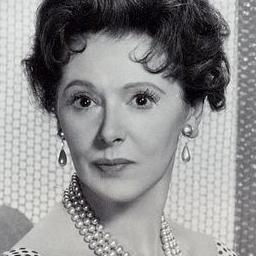

In [12]:
img = cv2.imread(img_list[0])
print(img_list[0])
cv2_imshow(img)

In [13]:
import os

In [14]:
filepath = img_list[0]
print(filepath)
basename = os.path.basename(filepath)
print(basename)
filename, ext = os.path.splitext(basename)
print(filename, ext)

splitted_filename = filename.split('_') # 10049200, 1891-09-16, 1958
print(splitted_filename)

date_of_birth = splitted_filename[1]
photo_taken = splitted_filename[2]
print('생년월일: ', date_of_birth)
print('사진연도: ', photo_taken)

wiki_crop/00/10049200_1891-09-16_1958.jpg
10049200_1891-09-16_1958.jpg
10049200_1891-09-16_1958 .jpg
['10049200', '1891-09-16', '1958']
생년월일:  1891-09-16
사진연도:  1958


In [15]:
splitted_dob = date_of_birth.split('-')
print(splitted_dob)

['1891', '09', '16']


In [16]:
year_of_birth = splitted_dob[0]
print(year_of_birth)

1891


In [17]:
year_of_birth = int(year_of_birth)
photo_taken = int(photo_taken)

age = photo_taken - year_of_birth

print('생년', year_of_birth)
print('사진', photo_taken)
print('나이', age)

생년 1891
사진 1958
나이 67


In [18]:
def label_func(filepath):
    basename = os.path.basename(filepath)
    filename, ext = os.path.splitext(basename)
    splitted_filename = filename.split('_')

    date_of_birth = splitted_filename[1]
    photo_taken = splitted_filename[2]

    splitted_dob = date_of_birth.split('-')
    year_of_birth = splitted_dob[0]

    year_of_birth = int(year_of_birth)
    photo_taken = int(photo_taken)

    age = photo_taken - year_of_birth

    return age

In [19]:
label_func(img_list[0])

67

wiki_crop/00/10110600_1985-09-17_2012.jpg


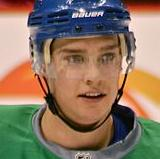

In [20]:
img = cv2.imread(img_list[1])
print(img_list[1])
cv2_imshow(img)

In [21]:
label_func(img_list[1])

27

wiki_crop/00/1013900_1917-10-15_1960.jpg


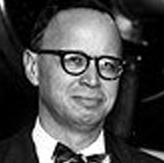

In [22]:
img = cv2.imread(img_list[3])
print(img_list[3])
cv2_imshow(img)

In [23]:
label_func(img_list[3])

43

# 2. Fast AI
* [공식 홈페이지](https://docs.fast.ai/)

In [24]:
from fastai.vision.all import *

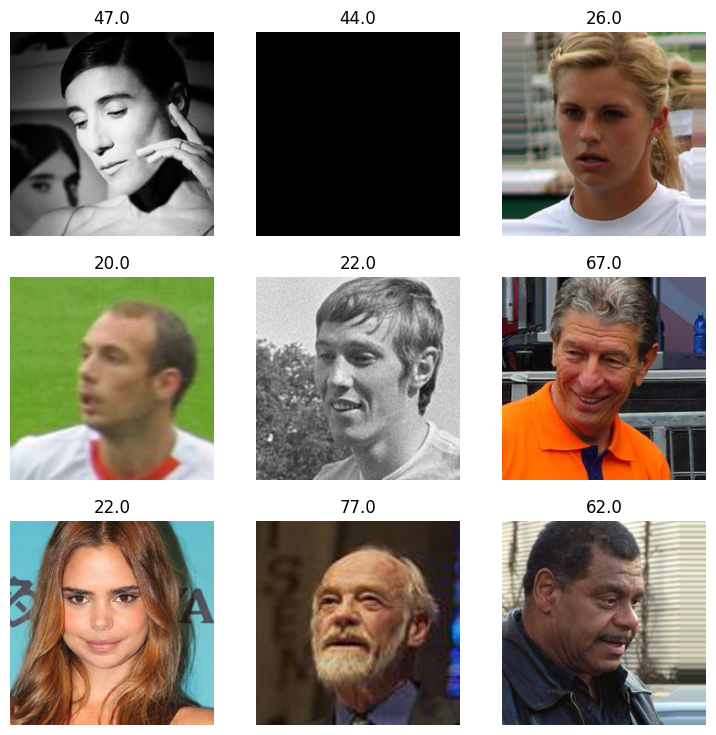

In [25]:
path = 'wiki_crop'

block = DataBlock(
    blocks = (ImageBlock, RegressionBlock),
    get_items = get_image_files,
    get_y = label_func,
    item_tfms = Resize(224)
)

loader = block.dataloaders(path)
loader.show_batch()

In [26]:
len(loader.train.items)

49863

In [27]:
len(loader.valid.items)

12465

In [28]:
from fastai.metrics import mae, mse

In [29]:
learn = vision_learner(loader, resnet50, loss_func=mse, metrics=mae)
learn.fine_tune(epochs=3)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:01<00:00, 96.8MB/s]


epoch,train_loss,valid_loss,mae,time
0,525.614990,326.969391,10.268331,07:02


epoch,train_loss,valid_loss,mae,time
0,302.507751,303.228088,9.436931,09:19
1,846.806946,281.394928,8.593126,09:13
2,594.587708,271.998962,8.349809,09:14


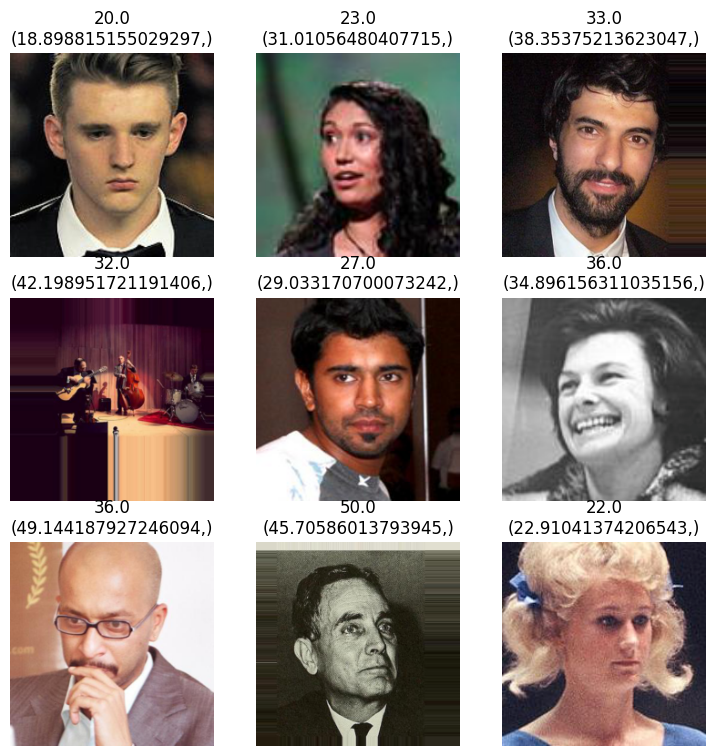

In [30]:
learn.show_results()

In [1]:
path = 'Image.jpg'

print(learn.predict(path))

img = cv2.imread(path)

cv2_imshow(img)

NameError: ignored